In [ ]:
import pandas as pd

df = pd.read_excel('players.xlsx')

print(f"Число строк: {df.shape[0]}, число столбцов: {df.shape[1]}")
print()

Число строк: 500, число столбцов: 13



In [ ]:
description = ["Имя футболиста, заданное типом string",
               "Клубу, к кторому принадлежит футболист. Номинальная переменная, выраженная типом string",
               "Лига, в которой играет футболист. Номинальная переменная, выраженная типом string",
               "Возраст футболиста в годах. Метрическая переменная, выраженная типом integer",
               "Рост футболиста в сантиметрах. Метрическая переменная, выраженная типом integer",
               "Номер футболиста. Порядковая переменная, выраженная типом integer",
               "Позиция футболиста. Номинальная переменная, выраженная типом string",
               "Текущая трансферная цена футболиста в млн €. Метрическая переменная, выраженная типом integer",
               "Общее количество игр. Метрическая переменная, выраженная типом integer",
               "Общее число голов. Метрическая переменная, выраженная типом integer",
               "Общее число голевых передач. Метрическая переменная, выраженная типом integer",
               "Страна, где родился футболист. Номинальная переменная, выраженная типом string",
               "Максимальная трансферная цена футболиста в млн €. Метрическая переменная, выраженная типом integer"]

for i in range(len(dict(df.dtypes))):
  print(str(df.dtypes.keys()[i]) + " - " + description[i] + ". Количество пустых значений: " + str(df[df.dtypes.keys()[i]].isna().sum()))
  print()

Name - Имя футболиста, заданное типом string. Количество пустых значений: 0

Club - Клубу, к кторому принадлежит футболист. Номинальная переменная, выраженная типом string. Количество пустых значений: 0

League - Лига, в которой играет футболист. Номинальная переменная, выраженная типом string. Количество пустых значений: 0

Age - Возраст футболиста в годах. Метрическая переменная, выраженная типом integer. Количество пустых значений: 0

Height - Рост футболиста в сантиметрах. Метрическая переменная, выраженная типом integer. Количество пустых значений: 0

Num - Номер футболиста. Порядковая переменная, выраженная типом integer. Количество пустых значений: 0

Position - Позиция футболиста. Номинальная переменная, выраженная типом string. Количество пустых значений: 0

Price - Текущая трансферная цена футболиста в млн €. Метрическая переменная, выраженная типом integer. Количество пустых значений: 0

Games - Общее количество игр. Метрическая переменная, выраженная типом integer. Количест

Составим отношение количества голов к общему числу матчей

In [ ]:
df["AvGoals"] = df["Goals"] / df["Games"]

Составим категориальную переменную, связанную с возрастом футболистов. Интервал 5 лет самый оптимальный относительно возрастов профессиональных футболистов

In [ ]:
df_old = df.copy()
labels = ["{0} - {1}".format(i, i + 4) for i in range(15, 31, 5)]
df["Age"] = pd.cut(df.Age, range(15, 36, 5), right=False, labels=labels)

In [ ]:
info_about_leagues = df.loc[:, ["Name", "Club", "League", "Position"]]
info_about_leagues.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Name,Kylian Mbappé,Erling Haaland,Vinicius Junior,Jude Bellingham,Phil Foden,Pedri,Jamal Musiala,Bukayo Saka,Federico Valverde,Gavi,...,Tommaso Pobega,Josip Sutalo,Sasa Kalajdzic,Arthur Melo,Alfonso Pedraza,Ben Godfrey,Gerson,Eddie Nketiah,Konstantinos Tsimikas,Umar Sadiq
Club,ПСЖ,Манчестер Сити,Реал Мадрид,Боруссия Д.,Манчестер Сити,Барселона,Бавария,Арсенал,Реал Мадрид,Барселона,...,Милан,Динамо Загреб,Вулверхэмптон,Ливерпуль,Вильярреал,Эвертон,Фламенго,Арсенал,Ливерпуль,Реал Сосьедад
League,Лига 1,Премьер-Лига,ЛаЛига,Бундеслига,Премьер-Лига,ЛаЛига,Бундеслига,Премьер-Лига,ЛаЛига,ЛаЛига,...,Серия А,SuperSport ХНЛ,Премьер-Лига,Премьер-Лига,ЛаЛига,Премьер-Лига,Кариока - Кубок Гуанабара,Премьер-Лига,Премьер-Лига,ЛаЛига
Position,ФРВ,ФРВ,ЛВ,ЦП,ЛВ,ЦП,ЦАП,ПВ,ЦП,ЦП,...,ЦП,ЦЗ,ФРВ,ЦП,ЛЗ,ЦЗ,ЦП,ФРВ,ЛЗ,ФРВ


Сделаем сортировку по нескольким полям.

In [ ]:
df = df.sort_values(by=['Club', 'League', 'Age'], ascending=[True, True, True])
df.head(20).loc[:, ['Club', 'League', 'Age']]

,Club,League,Age
157,Айнтрахт Ф.,Бундеслига,20 - 24
197,Айнтрахт Ф.,Бундеслига,20 - 24
251,Айнтрахт Ф.,Бундеслига,20 - 24
222,Айнтрахт Ф.,Бундеслига,25 - 29
383,Айнтрахт Ф.,Бундеслига,25 - 29
468,Аль-Наср,Саудовская Про-Лига,NaN
7,Арсенал,Премьер-Лига,20 - 24
50,Арсенал,Премьер-Лига,20 - 24
64,Арсенал,Премьер-Лига,20 - 24
84,Арсенал,Премьер-Лига,20 - 24


**Цель исследования:** основываясь на общей статистике игроков, выявить, какие из параметров влияют на цену игрока и насколько.

**Задачи исследования:**
1. Проанализировать влияние клуба и лиги на стоимость игроков
2. Изучить происхождение игроков, чтобы определить зависимость цены от стран.
3. Сравнить цены игроков в зависимости от позиции на которой они играют.
4. Изучить статистику голов и передач, чтобы выяснить влияние на клуб, в котором играет футболист.
5. Выяснить влияние роста и возраста игрока на его цену.

**Гипотезы:**
1. Количество забитых голов зависит от позиции игрока. Построим наглядный график, показывающий зависимость количества голов от позиции. Переменные: Position, Goals
2. Самые дорогие футболисты - форварды. Построим график для всех позиций, на котором отобразим зависимость с их ценой. Переменные: Position, Price
3. Самые дорогие игроки находятся в Премьер лиге. Построим график, показывающий количество дорогих игроков в разных лигах(игрок считается дорогим если его цена больше 70 млн Евро). Переменные: Price, League
4. У игроков с возрастом от 30 самая большая разница в текущей и максимальной цене. Построим сводную таблицу, где отобразим текущую и максимальную среднюю цену игроков разных возратсных категорий. Переменные: Age, Price, Max price
5. Самые дорогие игроки - французы. Построим сводную таублицу, где изобразим среднюю цену на игрока в каждой стране. Переменные: Country, Price
6. Средняя стоимость игроков с ростом 180 самая большая. Построим график, отражающий среднюю цену в зависимости от роста. Переменные: Height, Price
7. Самая большая средняя цена на игрока в Манчестер Юнайтед среди клубов Премеьер лиги. Построим сводную таблицу, где отобразим соотношение цен и клубов. Переменные: League, Club, Price
8. Самое большое среднее соотношение голов к сыгранным играм среди клубов Премьер Лиги у Манчестер сити. Построим сводную таблицу, с отношением голов к сыгранным играм и клубов. Переменные: League, Club, AvGoals
9. Игроки с левого фланга в среднем дороже игроков с правого фланга. Найдем средние цены на игроков левого и правого фланга. Переменные: Price, Position
10. Игроки с меньшим ростом имеют больше голевых передач. Построим график, на котором отобразим соотношение роста к количеству передач. Переменные: Height, Asists

1. Количество забитых голов зависит от позиции игрока.

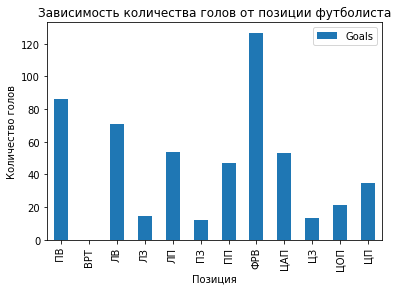

In [ ]:
df.groupby(['Position'])[['Goals']].mean().plot(kind='bar', title = 'Зависимость количества голов от позиции футболиста', xlabel='Позиция', ylabel='Количество голов')

Из графика видно, что позиция игрока напрямую влияет на количество забитых им мячей. Так, больше всего голов забивают форварды, меньше всех - вратари.

2. Самые дорогие футболисты - форварды.

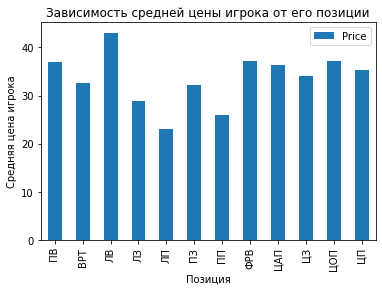

In [ ]:
df.groupby(['Position'])[['Price']].mean().plot(kind='bar', title = 'Зависимость средней цены игрока от его позиции', xlabel='Позиция', ylabel='Средняя цена игрока')

Из графика видно, что в среднем самыми дорогими игроками являются левые вингеры, самыми дешевыми - левые полузащитники

3. Самые дорогие игроки находятся в Премьер лиге.

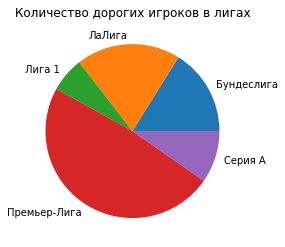

In [ ]:
df[df['Price'] > 70].groupby(['League']).size().plot(kind='pie', title = 'Количество дорогих игроков в лигах', ylabel='')

Из графика очевидно, что большинство дорогих игроков находится в Премьер лиге.

4. У игроков с возрастом от 30 самая большая разница в текущей и максимальной цене.

In [ ]:
df.groupby(['Age'])[['Price', 'Max price']].mean()

,Price,Max price
Age,,
15 - 19,44.307692,45.000000
20 - 24,36.891089,40.405941
25 - 29,33.983539,44.880658
30 - 34,37.179487,74.435897


Из графика следует, что у возрастной группы 30-34 наблюдается самая большая разница между максимальной и текущей ценой, в то время как у 15-19 она практически минимальна

5. Самые дорогие игроки - французы.

In [ ]:
df.groupby(['Country'])[['Price']].mean()

,Price
Country,
Австрия,25.375000
Албания,30.000000
Алжир,26.800000
Англия,38.318182
Аргентина,38.222222
Бельгия,35.214286
Бразилия,38.704545
Буркина-Фасо,30.000000
Венгрия,35.000000


В данном случае самыми дорогими игроками являются Норвежцы. Но для более точного ответа требуется датасет с большим количеством данных

6. Средняя стоимость игроков с ростом 180 самая большая.

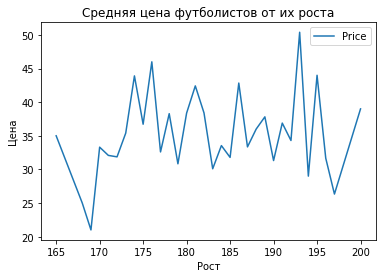

In [ ]:
df.groupby(['Height'])[['Price']].mean().plot(title='Средняя цена футболистов от их роста', xlabel='Рост', ylabel='Цена')

Самая высокая средняя цена наблюдается у футболистов с ростом 193

7. Самая большая средняя цена на игрока в Манчестер Юнайтед среди клубов Премьер лиги.

In [ ]:
df[df['League'] == 'Премьер-Лига'].groupby(['Club'])[['Price']].mean()

,Price
Club,
Арсенал,42.444444
Астон Вилла,26.266667
Борнмут,22.000000
Брайтон,30.800000
Брентфорд,27.000000
Вест Хэм,36.800000
Вулверхэмптон,25.900000
Кристал Пэлас,29.857143
Лестер,29.333333


Из таблицы следует, что самая большая средняя цена на игрока в Премьер лиге у Манчестер Сити

8. Самое большое среднее соотношение голов к сыгранным играм среди клубов Премьер Лиги у Манчестер сити.

In [ ]:
df[df['League'] == 'Премьер-Лига'].groupby(['Club'])[['AvGoals']].mean()

,AvGoals
Club,
Арсенал,0.146406
Астон Вилла,0.097491
Борнмут,0.170404
Брайтон,0.070255
Брентфорд,0.151840
Вест Хэм,0.159116
Вулверхэмптон,0.135915
Кристал Пэлас,0.089740
Лестер,0.141630


Самое большое среднее соотношение наблюдается у Фулхэм

9. Игроки с левого фланга в среднем дороже игроков с правого фланга.

In [ ]:
print(df[((df['Position'] == 'ЛВ') | (df['Position'] == 'ЛП') | (df['Position'] == 'ЛЗ'))]['Price'].mean())
print(df[((df['Position'] == 'ПВ') | (df['Position'] == 'ПП') | (df['Position'] == 'ПЗ'))]['Price'].mean())

36.831460674157306
31.620689655172413


Игроки с левого фланга дороже в среднем на 5 млн Евро.

10. Игроки с меньшим ростом имеют больше голевых передач.

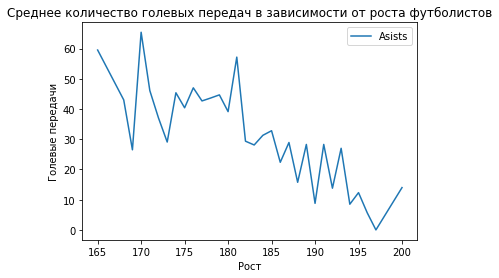

In [ ]:
df.groupby(['Height'])[['Asists']].mean().plot(title='Среднее количество голевых передач в зависимости от роста футболистов', xlabel='Рост', ylabel='Голевые передачи')

Футболисты с ростом до 185 имеют больше передач, чем с ростом выше 185.

Рассчитаем описательные статистики по всей выборке и отдельно для Премьер лиги и ЛаЛиги

**Описательные статистики по всей выборке**

In [ ]:
print("Среднее значение цены: " + str(df['Price'].mean()))
print("Минимальное значение цены: " + str(df['Price'].min()))
print("Максимальное значение цены: " + str(df['Price'].max()))
print("Медиана цены: " + str(df['Price'].median()))
print("Мода цены: " + str(df['Price'].mode()))
print("Стандартное отклонение цены: " + str(df['Price'].std()))

Среднее значение цены: 35.682
Минимальное значение цены: 18
Максимальное значение цены: 180
Медиана цены: 28.0
Мода цены: 0    20
dtype: int64
Стандартное отклонение цены: 20.517182690884788


Средняя цена на игрока равна 35,682 млн Евро, минимальная цена - 18 млн Евро, максимальная - 180 млн Евро. Медиана цены равна 28 млн Евро, мода - 20. Стандартное отклонение указываает на достаточно большой разброс в приблизительно 20 млн Евро.

**Описательные статистики для Премьер лиги**

In [ ]:
print("Среднее значение цены: " + str(df[df['League'] == 'Премьер-Лига']['Price'].mean()))
print("Минимальное значение цены: " + str(df[df['League'] == 'Премьер-Лига']['Price'].min()))
print("Максимальное значение цены: " + str(df[df['League'] == 'Премьер-Лига']['Price'].max()))
print("Медиана цены: " + str(df[df['League'] == 'Премьер-Лига']['Price'].median()))
print("Мода цены: " + str(df[df['League'] == 'Премьер-Лига']['Price'].mode()))
print("Стандартное отклонение цены: " + str(df[df['League'] == 'Премьер-Лига']['Price'].std()))

Среднее значение цены: 36.46511627906977
Минимальное значение цены: 18
Максимальное значение цены: 170
Медиана цены: 30.0
Мода цены: 0    22
dtype: int64
Стандартное отклонение цены: 20.15981572244775


Средняя цена на игрока чуть выше чем по всей выборке, минимальная и максимальная почти не отличаются от показателй по всей выборке. Медиана цены равна 30 млн Евро, мода - 22. Стандартное отклонение указываает на практически такой же разброс как и  по всей выборке.

**Описательные статистики для ЛаЛиги**

In [ ]:
print("Среднее значение цены: " + str(df[df['League'] == 'ЛаЛига']['Price'].mean()))
print("Минимальное значение цены: " + str(df[df['League'] == 'ЛаЛига']['Price'].min()))
print("Максимальное значение цены: " + str(df[df['League'] == 'ЛаЛига']['Price'].max()))
print("Медиана цены: " + str(df[df['League'] == 'ЛаЛига']['Price'].median()))
print("Мода цены: " + str(df[df['League'] == 'ЛаЛига']['Price'].mode()))
print("Стандартное отклонение цены: " + str(df[df['League'] == 'ЛаЛига']['Price'].std()))

Среднее значение цены: 39.371428571428574
Минимальное значение цены: 18
Максимальное значение цены: 120
Медиана цены: 35.0
Мода цены: 0    25
dtype: int64
Стандартное отклонение цены: 21.867301662243964


Средняя цена на игрока чуть выше чем по всей выборке и по Премьер лиге, минимальная цена - 18 млн Евро, максимальная - 120 млн Евро. Медиана цены равна 35 млн Евро, мода - 25. Стандартное отклонение указываает на чуть больший разброс, чем при всей выборке.

**Корреляция между числовыми данными**

In [ ]:
df_old.corr()

,Age,Height,Num,Price,Games,Goals,Asists,Max price,AvGoals
Age,1.000000,0.012508,-0.111977,-0.034632,0.878138,0.457932,0.515934,0.309617,0.070515
Height,0.012508,1.000000,0.019283,-0.002602,-0.034049,-0.107919,-0.297222,-0.053240,-0.156101
Num,-0.111977,0.019283,1.000000,0.018939,-0.059791,-0.015598,-0.009199,0.003716,0.030632
Price,-0.034632,-0.002602,0.018939,1.000000,0.115754,0.174656,0.210429,0.771190,0.229160
Games,0.878138,-0.034049,-0.059791,0.115754,1.000000,0.620708,0.694226,0.482172,0.233291
Goals,0.457932,-0.107919,-0.015598,0.174656,0.620708,1.000000,0.792371,0.478609,0.785584
Asists,0.515934,-0.297222,-0.009199,0.210429,0.694226,0.792371,1.000000,0.538201,0.562908
Max price,0.309617,-0.053240,0.003716,0.771190,0.482172,0.478609,0.538201,1.000000,0.344196
AvGoals,0.070515,-0.156101,0.030632,0.229160,0.233291,0.785584,0.562908,0.344196,1.000000


Можно сделать выводы, что:
1. Возраст напрямую влияет на количество сыгранных игр и имеет умеренную корреляцию с количеством голов и ассистов. Также возраст имеет положительную корреляцию с максимальной ценой, что говорит нам о большей максимальной стоимости игроков,чей возраст выше.
2. Рост имеет низкую корреляцию со всеми параметрами. Следовательно, практически ни с чем не связан.
3. Цена имеет высокую корреляцию с максимальной ценой, значит игроки, которые ранье стояли больше, сейчас также имеют большую цену.
4. Количество игр имеею умеренную корелляцию с количеством голов и асистов. Следовательно, чем больше игроки сыграют матчей, тем больше они забивают и дают голевых передач.
5. Количество голов имеет высокую корреляцию с количеством ассистом. Откуда следует, что при большем забивании голов шанс дать голевую передачу так же высок.
6. Соотношение голов к сыгранным играм имеет умеренную корреляцию с ассистами и высокую корреляцию с количеством голов, откуда следует, что этот показатель сильно зависит от количества голов и косвенно от количества голевых передач.

**Выводы**

В ходе исследования нашли подтверждение следующие гипотезы:
1. Количество забитых голов зависит от позиции игрока
2. Самые дорогие игроки находятся в Премьер лиге.
3. У игроков с возрастом от 30 самая большая разница в текущей и максимальной цене.
4. Игроки с левого фланга в среднем дороже игроков с правого фланга.
5. Игроки с меньшим ростом имеют больше голевых передач.

Однако есть гипотезы которые были опровергнуты:

1. Как оказалось, форварды - не самые дорогие игроки, откуда следует, что количество забитых голов не единственный влиящий на цену показатель.

2. Французы - не самая дорогая нация. Можно сделать вывод, что для подтверждения этого нужно либо больше данных, либо есть нации, чья средняя стоимость действительно больше.

3. Из этого следует что игроки с ростом 190-195 стоят дороже игроков в ростом ниже 175. Однако в диапазоне 180-190 зависимости не обнаружено.

4. Самая большая средняя цена на игрока в Манчестер Сити среди клубов Премьер лиги. Это означает, что состав этой команды самый дорогий относительно всех остальных команд лиги, следовательно стоимость игроков в более престижной команде выше.

5. Самое большое среднее соотношение голов к сыгранным играм среди клубов Премьер Лиги у Фулхэм. Из этого следует, что это соотношение не влияет на общие показатели успешности клуба.

По итогам исследования, его цели и задачи были реализованы. Было проанализировано влияние лиг и клубов на стоимость игроков, их происхождения, позиций, статистик голов и передач, а также влияние роста и возраста.

**Выводы проекта:**
1. Количество забитых голов не является основным показателем цены игрока.
2. Цена футболиста зависит от лиги и клуба, в котором он играет.
3. Игроки европейских наций имеют более высокую цену.
4. Французы - не самая дорогая нация.
5. Позиция практически не влияет на цену игрока, однако была найдена интересная зависимость, что игроки с левого фланга дороже игроков с правого.
6. В среднем рост не влияет на цену игроков, за исключением некоторых моментов. Игроки с ростом меньше 170 стоят дешевле, а игроки с ростом 193 оказались в выборке самыми дорогими среди всех.
7. Игроки с большим возрастом имеют большую разницу в максимальной и текущей цене. Однако игроки с более высокой максимальной ценой имеют большую текущую цену.

Большая часть выводов подтвердилась с начальными гипотезами, однако были обнаружены интересные особенности:
1. Франция оказалось не самой дорогой нацией, хотя показывает наибольшие успехи относительно других стран.
2. Разница между стоимостью игроков левого и правого фланга оказалась неожиданной.
3. особенность средней цены игроков с ростом 193, казалось, что максимальная цена должна быть у игроков со средним ростом.
